### In This Notebook we have Randomly sampleled the 10,000 data rows. Rest of the implementation is same as notebook for shuffled data where we have shuffled the data.

In [1]:
# Gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pandas as pd
import numpy as np
np.random.seed(2020)

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

/opt/conda/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import numpy as np
data = pd.read_excel('../input/abstractsclean/AbstractsCleanUpdated_v1.xlsx', usecols=['Publication Date','Title','Abstract']);
data.head(5)

,Publication Date,Title,Abstract
0,2020-01-01,"Dry Taps? A Synthesis of Alternative ""Wash"" Me...",Objective: Social distancing and hand washing ...
1,2020-01-17,"Pneumonia of unknown aetiology in Wuhan, China...",There is currently an outbreak of pneumonia of...
2,2020-01-19,A mathematical model for simulating the transm...,"As reported by the World Health Organization, ..."
3,2020-01-21,Epidemiological and Clinical Characteristics o...,"Background: Since December 2019, a novel coron..."
4,2020-01-22,Functional assessment of cell entry and recept...,"Over the past 20 years, several coronaviruses ..."


In [10]:
data =data.sample(n=10000)
data.tail()

,Publication Date,Title,Abstract
9591,2020-05-08,Risk of Transmission and Knowledge Gap for Nov...,Background A novel coronavirus disease 2019 is...
39516,2020-08-25,Impact of COVID-19 on the care of patients wit...,During the early stages of the coronavirus dis...
33128,2020-08-03,The Arts Unique to Critical Care Nursing: Hard...,: This commentary begins as a question and mak...
48024,2020-09-20,"Hyperglycemia, glucocorticoid therapy, and out...","Dear Editor,In our recent publication, we have..."
12936,2020-05-20,Susceptible supply limits the role of climate ...,Preliminary evidence suggests that climate may...


In [11]:
with open('../input/stopwords/StopWordsList.txt', 'r') as s:
    sw = s.readlines()
    stopwords_data = list(map(lambda x: x.replace('\n',''), sw))
    stopwords_data[0] = '$ 0.002'
    
    
# NLTK Stop words
stop_words = stopwords.words('english')

#extending stopwords with some custom stopwords
stop_words.extend(stopwords_data)

In [13]:
documents = data.Abstract.to_list()

In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(documents))

print(data_words[:1])

[['motivated', 'by', 'historical', 'and', 'present', 'clinical', 'observations', 'we', 'discuss', 'the', 'possible', 'unfavorable', 'evolution', 'of', 'the', 'immunity', 'similar', 'to', 'documented', 'antibody', 'dependent', 'enhancement', 'scenarios', 'after', 'first', 'infection', 'with', 'covid', 'more', 'precisely', 'we', 'ask', 'the', 'question', 'of', 'how', 'the', 'epidemic', 'outcomes', 'are', 'affected', 'if', 'the', 'initial', 'infection', 'does', 'not', 'provide', 'immunity', 'but', 'rather', 'sensitization', 'to', 'future', 'challenges', 'we', 'first', 'provide', 'background', 'comparison', 'with', 'the', 'sars', 'epidemic', 'then', 'we', 'use', 'compartmental', 'epidemic', 'model', 'structured', 'by', 'immunity', 'level', 'that', 'we', 'fit', 'to', 'available', 'data', 'using', 'several', 'scenarios', 'of', 'the', 'fragilization', 'dynamics', 'we', 'derive', 'quantitative', 'insights', 'into', 'the', 'additional', 'expected', 'numbers', 'of', 'severe', 'cases', 'and', 'de

In [15]:

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# To get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Print trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['motivated', 'by', 'historical', 'and', 'present', 'clinical', 'observations', 'we', 'discuss', 'the', 'possible', 'unfavorable', 'evolution', 'of', 'the', 'immunity', 'similar', 'to', 'documented', 'antibody_dependent_enhancement', 'scenarios', 'after', 'first', 'infection', 'with', 'covid', 'more', 'precisely', 'we', 'ask', 'the', 'question', 'of', 'how', 'the', 'epidemic', 'outcomes', 'are', 'affected', 'if', 'the', 'initial', 'infection', 'does', 'not', 'provide', 'immunity', 'but', 'rather', 'sensitization', 'to', 'future', 'challenges', 'we', 'first', 'provide', 'background', 'comparison', 'with', 'the', 'sars', 'epidemic', 'then', 'we', 'use', 'compartmental', 'epidemic', 'model', 'structured', 'by', 'immunity', 'level', 'that', 'we', 'fit', 'to', 'available', 'data', 'using', 'several', 'scenarios', 'of', 'the', 'fragilization', 'dynamics', 'we', 'derive', 'quantitative', 'insights_into', 'the', 'additional', 'expected', 'numbers', 'of', 'severe', 'cases', 'and', 'deaths']


In [16]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['motivated', 'historical', 'clinical', 'observation', 'possible', 'unfavorable', 'evolution', 'immunity', 'similar', 'document', 'antibody', 'scenario', 'first', 'infection', 'covid', 'precisely', 'ask', 'question', 'epidemic', 'outcome', 'affect', 'initial', 'infection', 'immunity', 'rather', 'sensitization', 'future', 'challenge', 'first', 'background', 'comparison', 'structure', 'immunity', 'level', 'datum', 'several', 'scenario', 'fragilization', 'dynamic', 'derive', 'quantitative', 'insight', 'additional', 'expect', 'severe', 'case', 'death']]


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 3), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)]]


In [19]:
# Term-frequency
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('additional', 1),
  ('affect', 1),
  ('antibody', 1),
  ('ask', 1),
  ('background', 1),
  ('case', 1),
  ('challenge', 1),
  ('clinical', 1),
  ('comparison', 1),
  ('covid', 1),
  ('datum', 1),
  ('death', 1),
  ('derive', 1),
  ('document', 1),
  ('dynamic', 1),
  ('epidemic', 1),
  ('evolution', 1),
  ('expect', 1),
  ('first', 2),
  ('fragilization', 1),
  ('future', 1),
  ('historical', 1),
  ('immunity', 3),
  ('infection', 2),
  ('initial', 1),
  ('insight', 1),
  ('level', 1),
  ('motivated', 1),
  ('observation', 1),
  ('outcome', 1),
  ('possible', 1),
  ('precisely', 1),
  ('quantitative', 1),
  ('question', 1),
  ('rather', 1),
  ('scenario', 2),
  ('sensitization', 1),
  ('several', 1),
  ('severe', 1),
  ('similar', 1),
  ('structure', 1),
  ('unfavorable', 1)]]

In [20]:
# Building LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=11, 
                                            random_state=100,
                                            chunksize=100,
                                            passes=10)

In [21]:
# Print the Keyword in the 11 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"case" + 0.026*"model" + 0.024*"covid" + 0.015*"country" + '
  '0.015*"datum" + 0.014*"rate" + 0.013*"death" + 0.013*"infection" + '
  '0.010*"estimate" + 0.010*"time"'),
 (1,
  '0.031*"virus" + 0.022*"human" + 0.022*"drug" + 0.020*"viral" + '
  '0.018*"protein" + 0.017*"target" + 0.017*"cell" + 0.011*"therapeutic" + '
  '0.011*"potential" + 0.011*"host"'),
 (2,
  '0.158*"patient" + 0.038*"covid" + 0.017*"hospital" + 0.015*"severe" + '
  '0.014*"clinical" + 0.013*"mortality" + 0.012*"outcome" + 0.012*"high" + '
  '0.011*"treatment" + 0.010*"risk"'),
 (3,
  '0.094*"antibody" + 0.047*"fig" + 0.032*"blood" + 0.031*"specimen" + '
  '0.031*"swab" + 0.029*"observational" + 0.028*"basis" + 0.028*"dengue" + '
  '0.027*"antibodie" + 0.027*"miss"'),
 (4,
  '0.024*"covid" + 0.020*"pandemic" + 0.018*"care" + 0.016*"health" + '
  '0.010*"medical" + 0.008*"risk" + 0.008*"system" + 0.007*"public" + '
  '0.006*"staff" + 0.006*"challenge"'),
 (5,
  '0.041*"covid" + 0.026*"respiratory" + 0

In [22]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.25475971945283

Coherence Score:  0.49945630482191833


In [23]:
def compute_LDA_coherence(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics, 
                                                    random_state=100,
                                                    chunksize=100,
                                                    passes=10)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
LDA_model_list, LDA_coherence_values = compute_LDA_coherence(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=8, limit=30)

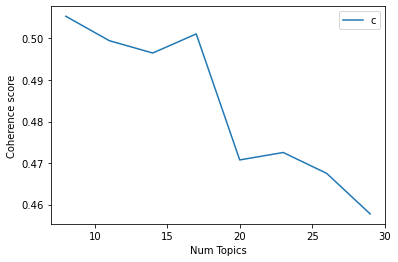

Num Topics = 8  has Coherence Value of 0.5053
Num Topics = 11  has Coherence Value of 0.4995
Num Topics = 14  has Coherence Value of 0.4965
Num Topics = 17  has Coherence Value of 0.5011
Num Topics = 20  has Coherence Value of 0.4708
Num Topics = 23  has Coherence Value of 0.4725
Num Topics = 26  has Coherence Value of 0.4675
Num Topics = 29  has Coherence Value of 0.4578


In [25]:
# Show graph
limit=30; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, LDA_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, LDA_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [26]:
# Select the model with 14 topics and print the topics with 50 words
lda_optimal_model = LDA_model_list[1]
lda_model_topics = lda_optimal_model.show_topics(formatted=False)
pprint(lda_optimal_model.print_topics(num_words=50))

[(0,
  '0.033*"case" + 0.026*"model" + 0.024*"covid" + 0.015*"country" + '
  '0.015*"datum" + 0.014*"rate" + 0.013*"death" + 0.013*"infection" + '
  '0.010*"estimate" + 0.010*"time" + 0.010*"spread" + 0.010*"measure" + '
  '0.009*"epidemic" + 0.009*"population" + 0.009*"transmission" + '
  '0.008*"different" + 0.008*"outbreak" + 0.007*"report" + 0.007*"analysis" + '
  '0.006*"region" + 0.006*"individual" + 0.006*"disease" + 0.006*"early" + '
  '0.006*"period" + 0.006*"pandemic" + 0.006*"infect" + 0.006*"control" + '
  '0.005*"high" + 0.005*"mortality" + 0.005*"increase" + 0.005*"first" + '
  '0.005*"predict" + 0.005*"state" + 0.005*"lockdown" + 0.005*"intervention" + '
  '0.004*"parameter" + 0.004*"level" + 0.004*"effect" + 0.004*"method" + '
  '0.004*"people" + 0.004*"dynamic" + 0.004*"public" + 0.004*"cluster" + '
  '0.004*"large" + 0.004*"contact" + 0.004*"total" + 0.004*"impact" + '
  '0.004*"policy" + 0.004*"new" + 0.003*"infectious"'),
 (1,
  '0.031*"virus" + 0.022*"human" + 0.02

In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.088183 -0.163852       1        1  21.926265
0      0.137194 -0.042152       2        1  14.613972
5      0.096949 -0.022978       3        1  13.034412
2      0.111271  0.191973       4        1  12.589080
6      0.045105 -0.066548       5        1   8.142165
1     -0.007527 -0.160925       6        1   7.181229
7      0.067636  0.174094       7        1   6.586005
10     0.035574  0.135712       8        1   5.995806
9     -0.056536 -0.213947       9        1   5.215692
8     -0.065508  0.130458      10        1   3.966361
3     -0.452343  0.038165      11        1   0.749013, topic_info=           Term          Freq         Total Category  logprob  loglift
63      patient  29545.000000  29545.000000  Default  30.0000  30.0000
222        test   5575.000000   5575.000000  Default  29.0000  29.0000
205      health   7919.000000   7919.000000  Default  28.0000  28.0000
595   treatment   5242.000000   5242.000000  Default  27.0000  27.0000
5          case  10331.000000  10331.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
5176      smart     46.237957     47.204817  Topic11  -5.2876   4.8735
958         fig    431.984943    786.639531  Topic11  -3.0530   4.2948
1082       pool    133.746622    207.225839  Topic11  -4.2254   4.4563
96        blood    296.413693    998.735370  Topic11  -3.4296   3.6794
2277     native     63.367086     93.095169  Topic11  -4.9724   4.5095

[698 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1817      3  0.997560  abnormality
600       1  0.789632       access
600       5  0.210137       access
81        2  0.176950     accuracy
81        8  0.820930     accuracy
...     ...       ...          ...
1051      7  0.654212         year
531       3  0.998579     year_old
1856      3  0.051723        young
1856      5  0.139495        young
1856      7  0.808756        young

[1323 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 6, 3, 7, 2, 8, 11, 10, 9, 4])

In [28]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4731,"case, model, covid, country, datum, rate, deat...",Motivated by historical and present clinical o...
1,1,4.0,0.4915,"covid, pandemic, care, health, medical, risk, ...",The dramatic spread of COVID-19 has raised man...
2,2,2.0,0.5384,"patient, covid, hospital, severe, clinical, mo...",Background: Severe cases of coronavirus diseas...
3,3,5.0,0.4137,"covid, respiratory, infection, case, disease, ...",The recent emergence of Severe acute respirato...
4,4,4.0,0.7448,"covid, pandemic, care, health, medical, risk, ...",To limit the spread of the novel coronavirus (...
5,5,4.0,0.6143,"covid, pandemic, care, health, medical, risk, ...","The number of people infected with SARS-CoV-2,..."
6,6,4.0,0.8305,"covid, pandemic, care, health, medical, risk, ...",This is an open letter to acknowledge the esse...
7,7,1.0,0.4750,"virus, human, drug, viral, protein, target, ce...",Replication of the SARS-CoV-2 genome is a fund...
8,8,5.0,0.6991,"covid, respiratory, infection, case, disease, ...",The few pathological analyses of coronavirus d...
9,9,5.0,0.6664,"covid, respiratory, infection, case, disease, ...",WHO has confirmed that COVID-19 disease is a p...


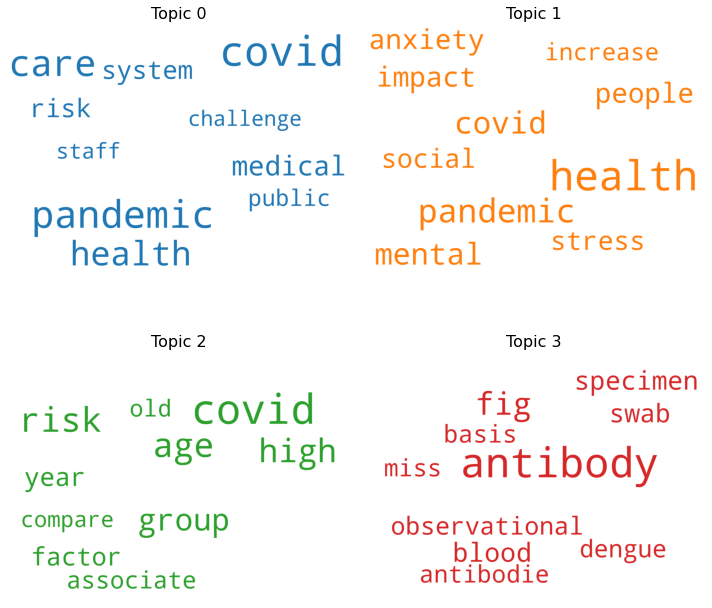

In [30]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


### Most representative document for each topic

In [31]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9767,"case, model, covid, country, datum, rate, deat...","In this paper, we estimate the reproductive nu..."
1,1.0,0.8868,"virus, human, drug, viral, protein, target, ce...","The virus that causes COVID-19, SARS-CoV-2, ha..."
2,2.0,0.9605,"patient, covid, hospital, severe, clinical, mo...",This study aims to investigate the association...
3,3.0,0.3481,"antibody, fig, blood, specimen, swab, observat...",Covid-19 spread through blood transfusion has ...
4,4.0,0.9521,"covid, pandemic, care, health, medical, risk, ...",The emergence of a novel coronavirus (2019-nCo...


## Building LDA Mallet Model

In [47]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    

--2020-11-30 04:26:52--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.13MB/s    in 1.7s    

2020-11-30 04:26:54 (9.13 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [48]:
!unzip ./mallet-2.0.8.zip

Archive:  ./mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  

  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/OneLabelKLGEConstraints$OneLabelGEKLConstraint.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/OneLabelKLGEConstraints.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/OneLabelL2GEConstraints$OneLabelGEL2Constraint.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/OneLabelL2GEConstraints.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/OneLabelL2RangeGEConstraints$OneLabelL2IndGEConstraint.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/OneLabelL2RangeGEConstraints.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/SelfTransitionGEConstraint.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/semi_supervised/constraints/TwoLabelGEConstraints$TwoLabelGEConstraint.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/se

  inflating: mallet-2.0.8/class/cc/mallet/pipe/tests/TestSpacePipe.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/Token2FeatureVector.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequence2FeatureSequence.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequence2FeatureSequenceWithBigrams.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequence2FeatureVectorSequence.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequence2TokenInstances$TokenInstanceIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequence2TokenInstances.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequenceLowercase.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequenceMatchDataAndTarget.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequenceNGrams.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequenceParseFeatureString.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/TokenSequenceR

  inflating: mallet-2.0.8/dist/mallet-deps.jar  
  inflating: mallet-2.0.8/dist/mallet.jar  
   creating: mallet-2.0.8/lib/
  inflating: mallet-2.0.8/lib/bsh.jar  
  inflating: mallet-2.0.8/lib/derby.jar  
  inflating: mallet-2.0.8/lib/grmm-deps.jar  
  inflating: mallet-2.0.8/lib/jdom-1.0.jar  
  inflating: mallet-2.0.8/lib/jgrapht-0.6.0.jar  
  inflating: mallet-2.0.8/lib/junit-4.5.jar  
  inflating: mallet-2.0.8/lib/jwnl-1.3.jar  
  inflating: mallet-2.0.8/lib/LICENSES  
  inflating: mallet-2.0.8/lib/Makefile  
  inflating: mallet-2.0.8/lib/mallet-deps.jar  
  inflating: mallet-2.0.8/lib/mtj-0.9.9.jar  
  inflating: mallet-2.0.8/lib/openjgraph.jar  
  inflating: mallet-2.0.8/lib/trove-2.0.2.jar  
  inflating: mallet-2.0.8/LICENSE    
  inflating: mallet-2.0.8/Makefile   
  inflating: mallet-2.0.8/pom.xml    
  inflating: mallet-2.0.8/README.md  
   creating: mallet-2.0.8/sample-data/
   creating: mallet-2.0.8/sample-data/numeric/
  inflating: mallet-2.0.8/sample-data/numeric/boxes.t

  inflating: mallet-2.0.8/src/cc/mallet/grmm/types/Universe.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/types/UnmodifiableVarSet.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/types/Variable.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/types/VarSet.java  
   creating: mallet-2.0.8/src/cc/mallet/grmm/util/
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/CachingOptimizable.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/CSIntInt2ObjectMultiMap.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/Flops.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/GeneralUtils.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/Graphs.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/LabelsAssignment.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/LabelsSequence2Assignment.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/Matrices.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/util/MIntInt2ObjectMap.java  
  inflating: mallet-2

In [49]:
import os
os.environ.update({'MALLET_HOME': './mallet-2.0.8'})
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, id2word=id2word)

In [50]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(9,
  [('health', 0.03836524231904022),
   ('pandemic', 0.03439096806619447),
   ('public', 0.023650189406278794),
   ('country', 0.021853854673727906),
   ('covid', 0.018233262907083887),
   ('community', 0.01606463082063644),
   ('system', 0.015524799657486434),
   ('global', 0.011494680801556204),
   ('policy', 0.011364376727692409),
   ('strategy', 0.010861775299932055)]),
 (1,
  [('covid', 0.0365017602371688),
   ('trial', 0.018382532206001386),
   ('clinical', 0.01806071599231542),
   ('evidence', 0.0172708034678135),
   ('treatment', 0.014003881298577183),
   ('datum', 0.013916113240299191),
   ('review', 0.012024223984084726),
   ('article', 0.011634143725071433),
   ('information', 0.009664238417054308),
   ('publish', 0.00890358191197839)]),
 (4,
  [('patient', 0.20558993741434844),
   ('severe', 0.0357357960248946),
   ('covid', 0.032148250307690966),
   ('treatment', 0.028630535164058203),
   ('clinical', 0.02413519199043321),
   ('hospital', 0.019020102476366714),
   ('re

In [51]:
def compute_mallet_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
mallet_model_list, mallet_coherence_values = compute_mallet_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=8, limit=30)

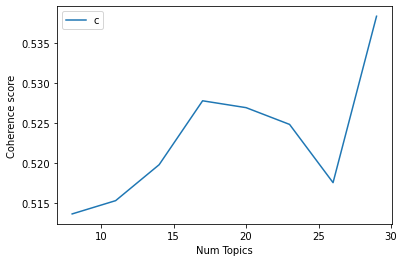

Num Topics = 8  has Coherence Value of 0.5136
Num Topics = 11  has Coherence Value of 0.5153
Num Topics = 14  has Coherence Value of 0.5198
Num Topics = 17  has Coherence Value of 0.5278
Num Topics = 20  has Coherence Value of 0.5269
Num Topics = 23  has Coherence Value of 0.5248
Num Topics = 26  has Coherence Value of 0.5175
Num Topics = 29  has Coherence Value of 0.5384


In [53]:
# Show graph
limit=30; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, mallet_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, mallet_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [54]:
# Select the model with 11 topics and print the topics with 50 words
mallet_optimal_model = mallet_model_list[7]
mallet_model_topics = mallet_optimal_model.show_topics(formatted=False)
pprint(mallet_optimal_model.print_topics(num_words=50))

[(22,
  '0.056*"time" + 0.049*"period" + 0.041*"increase" + 0.034*"change" + '
  '0.030*"week" + 0.026*"decrease" + 0.026*"lockdown" + 0.018*"compare" + '
  '0.018*"month" + 0.016*"daily" + 0.016*"reduction" + 0.015*"significant" + '
  '0.014*"average" + 0.013*"year" + 0.013*"effect" + 0.011*"temperature" + '
  '0.011*"observe" + 0.011*"activity" + 0.011*"decline" + 0.010*"phase" + '
  '0.010*"trend" + 0.010*"follow" + 0.010*"datum" + 0.009*"reduce" + '
  '0.009*"early" + 0.008*"pre" + 0.008*"total" + 0.008*"long" + '
  '0.007*"significantly" + 0.007*"volume" + 0.007*"pandemic" + 0.007*"impact" '
  '+ 0.006*"duration" + 0.006*"delay" + 0.006*"low" + 0.006*"pattern" + '
  '0.006*"post" + 0.006*"start" + 0.005*"remain" + 0.005*"hour" + '
  '0.005*"condition" + 0.005*"difference" + 0.005*"rise" + 0.005*"report" + '
  '0.005*"peak" + 0.005*"weekly" + 0.005*"date" + 0.005*"short" + '
  '0.004*"event" + 0.004*"fall"'),
 (16,
  '0.102*"country" + 0.097*"pandemic" + 0.087*"covid" + 0.041*"spre

### Most representative document for each topic

In [55]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=mallet_optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.0995,"model, estimate, datum, time, epidemic, predic...",Motivated by historical and present clinical o...
1,1,18.0,0.1059,"mask, droplet, air, wear, ppe, virus, protecti...",The dramatic spread of COVID-19 has raised man...
2,2,19.0,0.1721,"level, severe, covid, high, severity, low, inc...",Background: Severe cases of coronavirus diseas...
3,3,3.0,0.1311,"measure, control, intervention, strategy, publ...",The recent emergence of Severe acute respirato...
4,4,23.0,0.1171,"cancer, patient, covid, pandemic, surgery, pro...",To limit the spread of the novel coronavirus (...
5,5,28.0,0.0918,"covid, datum, review, information, article, ev...","The number of people infected with SARS-CoV-2,..."
6,6,8.0,0.2040,"care, medical, health, hospital, staff, work, ...",This is an open letter to acknowledge the esse...
7,7,5.0,0.3822,"protein, target, drug, bind, viral, potential,...",Replication of the SARS-CoV-2 genome is a fund...
8,8,21.0,0.4513,"patient, covid, lung, case, image, feature, cl...",The few pathological analyses of coronavirus d...
9,9,4.0,0.0911,"symptom, report, covid, child, disease, respir...",WHO has confirmed that COVID-19 disease is a p...


In [56]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4174,"acute, respiratory, severe, complication, dise...",To the Editor: We provide follow-up informatio...
1,1.0,0.2859,"author, report, important, interest, role, rec...",We read the recent letter by De Franceschi et ...
2,2.0,0.2983,"covid, risk, disease, increase, factor, high, ...",From the Authors:We agree with Sharma and Zeki...
3,3.0,0.4448,"measure, control, intervention, strategy, publ...","During the pre-vaccine period, the success of ..."
4,4.0,0.3707,"symptom, report, covid, child, disease, respir...","Dear Editor,As reported in this Journal by Noh..."


## TF-IDF

In [57]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.1124823636570444),
 (1, 0.07731787750482405),
 (2, 0.12068524939286522),
 (3, 0.1546409944717476),
 (4, 0.1405884637209053),
 (5, 0.038984702048708936),
 (6, 0.08594574811583863),
 (7, 0.04510676970563031),
 (8, 0.12725229482226788),
 (9, 0.007741057335584289),
 (10, 0.051604043615713024),
 (11, 0.06717526963523478),
 (12, 0.13689769336376123),
 (13, 0.1295300634719627),
 (14, 0.11212544691264334),
 (15, 0.08778707987801435),
 (16, 0.1399970727145958),
 (17, 0.11802726917292002),
 (18, 0.13213208546520339),
 (19, 0.3540423266360437),
 (20, 0.09364348261754449),
 (21, 0.1837232477523203),
 (22, 0.4067024060543905),
 (23, 0.07524164601460982),
 (24, 0.10379022771323475),
 (25, 0.13530685984112467),
 (26, 0.0606740720597974),
 (27, 0.24293742706878635),
 (28, 0.13428174156504),
 (29, 0.07003753639903161),
 (30, 0.08224611576497114),
 (31, 0.21737596590950933),
 (32, 0.15296030460435633),
 (33, 0.11212544691264334),
 (34, 0.13466296443049627),
 (35, 0.2496087619103637),
 (36, 0.2792

## Running LDA using TF-IDF

In [58]:
lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                                  id2word=id2word,
                                                  num_topics=11,
                                                  random_state=100)
# Show Topics
pprint(lda_model_tfidf.show_topics(formatted=False))

[(1,
  [('clpro', 0.0017367539),
   ('mpro', 0.0017220281),
   ('zinc', 0.0017086974),
   ('youth', 0.0015995455),
   ('compound', 0.0015855652),
   ('inhibitor', 0.0015253618),
   ('saliva', 0.0014398351),
   ('endoscopy', 0.0014332636),
   ('phytochemical', 0.0013817186),
   ('drug', 0.0012830433)]),
 (4,
  [('patient', 0.004616154),
   ('case', 0.0036933168),
   ('model', 0.0032303361),
   ('health', 0.003157984),
   ('test', 0.0028432999),
   ('pandemic', 0.0027457622),
   ('infection', 0.0026544363),
   ('care', 0.002552713),
   ('country', 0.0025252355),
   ('risk', 0.002380469)]),
 (7,
  [('d', 0.0016770558),
   ('vte', 0.0015801367),
   ('firm', 0.0015748539),
   ('psychosis', 0.0012557794),
   ('curative', 0.000955545),
   ('specialized', 0.0009081516),
   ('engineering', 0.00088434434),
   ('cranial', 0.0008470018),
   ('hyposmia', 0.0008389128),
   ('patient', 0.000735731)]),
 (8,
  [('orthopaedic', 0.00211059),
   ('cns', 0.0020750342),
   ('surgery', 0.0017597867),
   ('ra

In [59]:
# Compute Coherence Score
coherence_lda_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldatfidf = coherence_lda_model_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)


Coherence Score:  0.5272471721266384


### Finding the optimal number of topics for LDA with TF-IDF

In [61]:
def compute_lda_tfidf_coherence(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_tfidf_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics, 
                                                    random_state=100)
        model_list.append(lda_tfidf_model)
        coherencemodel = CoherenceModel(model=lda_tfidf_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [62]:
LDA_tfidf_model_list, LDA_tfidf_coherence_values = compute_lda_tfidf_coherence(dictionary=id2word, corpus=corpus_tfidf, texts=data_lemmatized, start=8, limit=30)

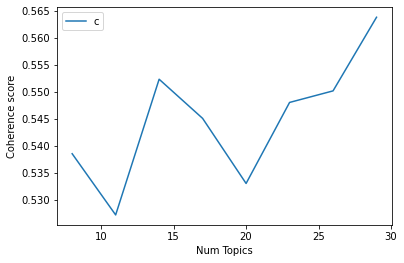

Num Topics = 8  has Coherence Value of 0.5386
Num Topics = 11  has Coherence Value of 0.5272
Num Topics = 14  has Coherence Value of 0.5524
Num Topics = 17  has Coherence Value of 0.5451
Num Topics = 20  has Coherence Value of 0.5331
Num Topics = 23  has Coherence Value of 0.5481
Num Topics = 26  has Coherence Value of 0.5502
Num Topics = 29  has Coherence Value of 0.5638


In [63]:
# Show graph
limit=30; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, LDA_tfidf_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, LDA_tfidf_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Select the model with 17 topics and print the topics with 50 words
lda_tfidf_optimal_model = LDA_tfidf_model_list[7]
lda_tfidf_model_topics = lda_tfidf_optimal_model.show_topics(formatted=False)
pprint(lda_tfidf_optimal_model.print_topics(num_words=50))